# Building a Neural Network to read hand written digits

### Importing important libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

### Loading the MNIST dataset

The dataset that comes with keras already is divided into testing and training sets.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### Visualizing the dataset

Viewing the first 20 digits images in the dataset.

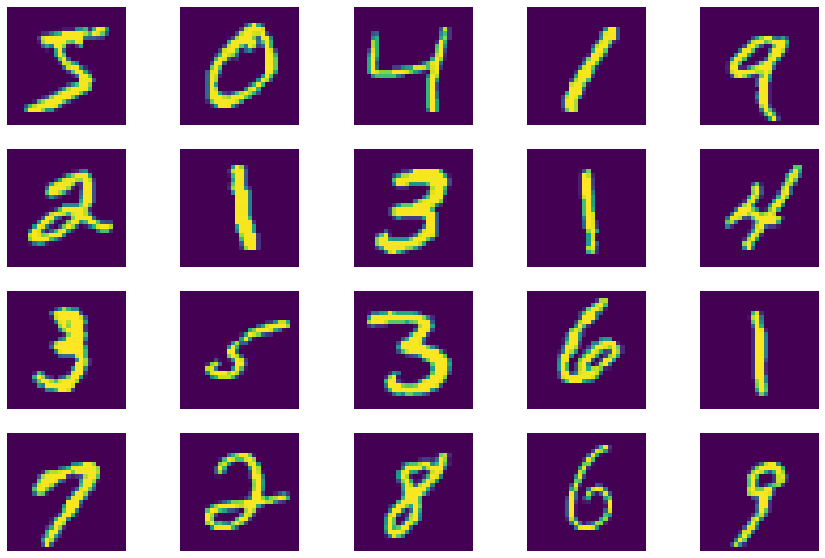

In [5]:
plt.figure(figsize = (15,10))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

In [6]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

### Let's flatten the dataset to fit into our neural network

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

### Building the neural network without any hidden layers 

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.9301 - accuracy: 0.8389
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0890 - accuracy: 0.8783
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6198 - accuracy: 0.8842
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5741 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4339 - accuracy: 0.8868
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3981 - accuracy: 0.8876
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2888 - accuracy: 0.8890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2982 - accuracy: 0.8896
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3029 - accuracy: 0.8901
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.249

We got about 89 % accuracy without any hidden layer in our neural network

### Feature scaling of X_train and X_test to improve accuracy of our model

In [10]:
scaled_X_train = X_train_flattened / 255
scaled_X_test = X_test_flattened / 255

### Let's build a neural network with scaled features and without any hidden layers 

In [11]:
scaled_model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

scaled_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

scaled_model.fit(scaled_X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [12]:
scaled_model.evaluate(scaled_X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9245


[0.26646536588668823, 0.9244999885559082]

Just scaling our dataset improved the accuracy of the model from 89% to 92% and that too without introducing any hidden layer in it.

### Comparing the predicted result with the actual label

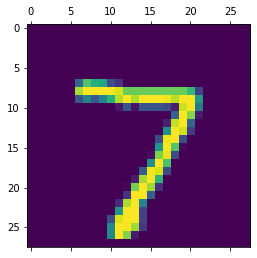

In [13]:
plt.matshow(X_test[0])

In [14]:
#scaled_model.predict(scaled_X_test[0:1])
y_predicted = scaled_model.predict(scaled_X_test)

In [15]:
np.argmax(y_predicted[0])

7

Storing all the predicted values in y_predicted_labels variable.

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

### Generating a confusion matrix

In [17]:
confusion_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1118,    3,    3,    0,    1,    3,    2,    5,    0],
       [   6,    8,  938,   18,    5,    3,   11,    8,   30,    5],
       [   2,    0,   19,  934,    0,   18,    2,    9,   16,   10],
       [   1,    1,   10,    2,  892,    0,   10,    4,    8,   54],
       [   7,    2,    3,   48,    7,  770,   13,    8,   26,    8],
       [  12,    3,   10,    1,    7,   11,  911,    1,    2,    0],
       [   1,    6,   25,    7,    4,    1,    0,  943,    2,   39],
       [   8,   12,    7,   36,    8,   28,    9,   10,  842,   14],
       [  11,    8,    1,   15,   15,    4,    0,   15,    2,  938]])>

### Visualizing the confusion matrix to have a better understanding of the model

Text(114.0, 0.5, 'Truth')

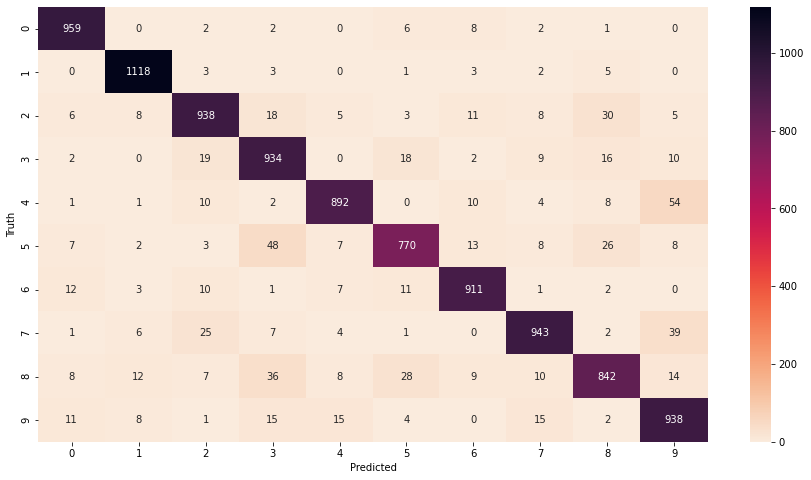

In [18]:
plt.figure(figsize = (15,8))
colormap = sns.color_palette("Blues")
sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap='rocket_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now, let's add a hidden layer to our neural network.

We are using relu function as our activation function for our hidden layer and then sigmoid function for our outer layer.

In [19]:
scaled_model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'), # One Hidden layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

scaled_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

scaled_model.fit(scaled_X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2765 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1255 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [20]:
scaled_model.evaluate(scaled_X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9776


[0.08197644352912903, 0.9775999784469604]

Adding a hidden layer to our neural network improved its accuracy from 92% to 97%

### Predicting the label of the image

In [21]:
y_predicted = scaled_model.predict(scaled_X_test)

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

### Plotting the confusion matrix

In [23]:
confusion_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    0,    2,    4,    5,    1,    4,    0],
       [   0, 1121,    3,    1,    0,    0,    1,    1,    8,    0],
       [   4,    0, 1006,    2,    2,    0,    2,    3,   13,    0],
       [   0,    0,    6,  987,    0,    4,    0,    4,    6,    3],
       [   2,    0,    3,    0,  956,    0,    5,    2,    3,   11],
       [   1,    0,    0,    9,    1,  863,    5,    0,   10,    3],
       [   1,    3,    0,    1,    3,    2,  944,    0,    4,    0],
       [   1,    1,    9,    1,    1,    0,    0,  998,    8,    9],
       [   3,    0,    2,    3,    3,    1,    0,    2,  958,    2],
       [   0,    1,    1,    1,    6,    3,    0,    6,   11,  980]])>

Text(114.0, 0.5, 'Truth')

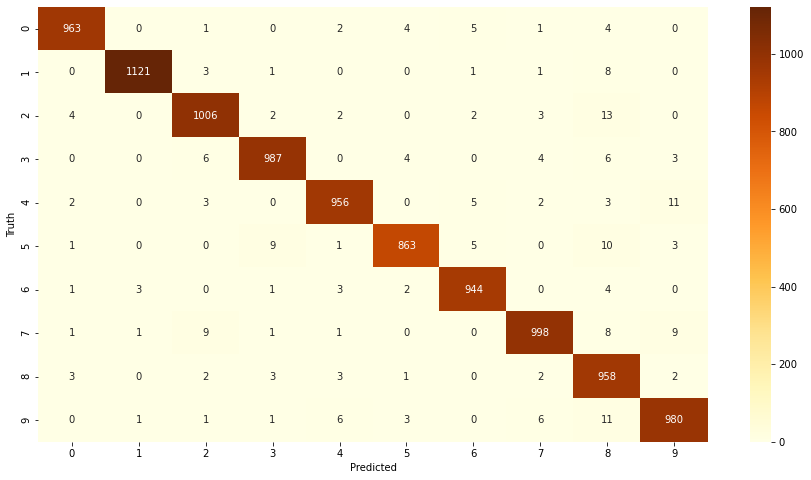

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Trying the flatten function offered by keras instead of manually scaling the dataset 

In [25]:
scaled_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Applying the flatten function
    keras.layers.Dense(100, activation = 'relu'), # One Hidden layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

scaled_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

scaled_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.7618 - accuracy: 0.8397
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3949 - accuracy: 0.9035
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967 - accuracy: 0.9244
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9347
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2330 - accuracy: 0.9399
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2218 - accuracy: 0.9443
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2064 - accuracy: 0.9474
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2007 - accuracy: 0.9488
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1955 - accuracy: 0.9504
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.187

### Adding two hidden layers to the neural network

In [26]:
scaled_model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'), # First Hidden layer
    keras.layers.Dense(50, activation = 'relu'), # Second Hidden layer
    keras.layers.Dense(10, activation = 'sigmoid')  # Outer layer
])

scaled_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

scaled_model.fit(scaled_X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9281
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1062 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [27]:
scaled_model.evaluate(scaled_X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9795


[0.08512275665998459, 0.9794999957084656]

#### Adding two hidden layers to the neural network improved the accuracy from 95% to 97%

In [28]:
y_predicted = scaled_model.predict(scaled_X_test)

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
print("CLASSIFICATION REPORT CHART FOR OUR NEURAL NETWORK: ","\n\n",classification_report(y_test, y_predicted_labels),"\n")

CLASSIFICATION REPORT CHART FOR OUR NEURAL NETWORK:  

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 



In [31]:
confusion_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(114.0, 0.5, 'Truth')

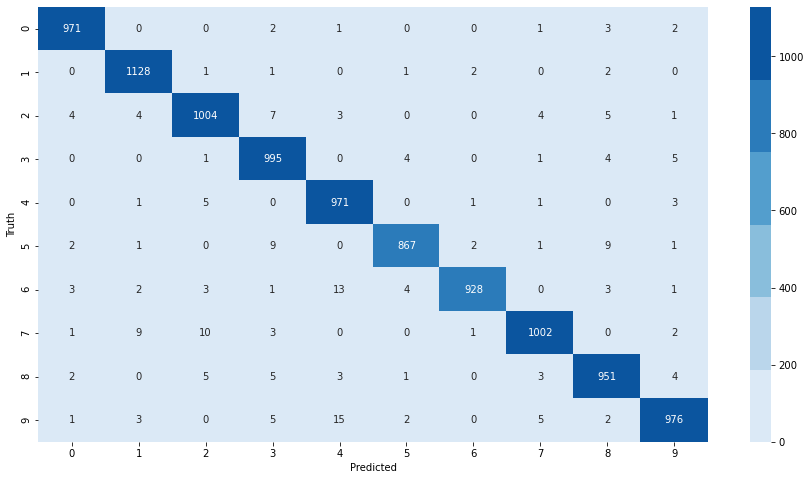

In [32]:
plt.figure(figsize = (15,8))
sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap=colormap)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ----------------------------------------------------THANK YOU--------------------------------------------------------------